In [58]:
import datetime as dt
print(dt.datetime.now())

2020-05-13 23:06:36.619337


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [60]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                  "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                  "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                  "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                  "ies/time_series_covid19_recovered_global.csv")


In [61]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45


In [62]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,345,397,421,458,468,472,502,558,558,610
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,531,543,570,595,605,620,627,650,654,682
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,493,499,514,521,526,537,545,550,550,568
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,13


In [63]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')

In [64]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(5)

In [65]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,210717,211938,213013,214457,215858,217185,218268,219070,219814,221216
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,187842,191832,196243,202359,207977,212629,216525,220449,224332,227741
Spain,0,0,0,0,0,0,0,0,0,0,...,217466,218011,219329,220325,221447,222857,223578,224350,227436,228030
Russia,0,0,0,0,0,0,0,0,0,2,...,134687,145268,155370,165929,177160,187859,198676,209688,221344,232243
US,1,1,2,2,5,5,5,5,5,7,...,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376


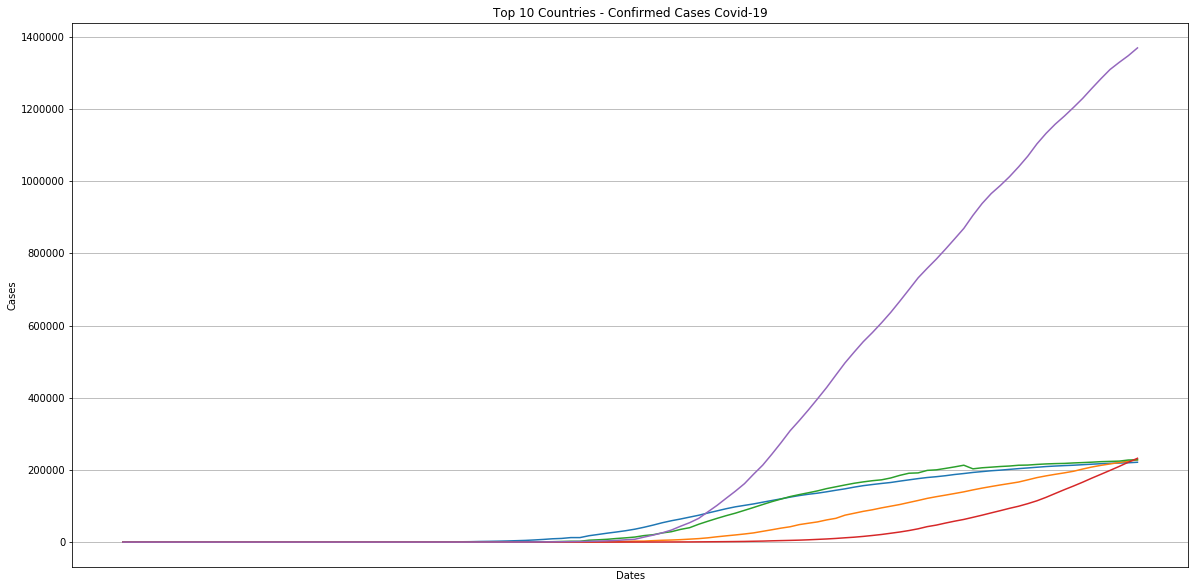

In [69]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(1,1,1)
ax.tick_params(axis = 'x', labelrotation = 90)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize = 12)
ax.grid(True)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set(xlabel='Dates', ylabel="Cases")
ax.plot(df_top10.T); # Semi-colon supress unwanted output
